<a href="https://colab.research.google.com/github/MethodFunc/DL-COLAB/blob/master/Cifar_100_keras_full_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import

In [28]:
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# From

In [29]:
from tensorflow import keras

In [30]:
from keras.datasets import cifar100
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from keras.callbacks import ModelCheckpoint, EarlyStopping

Using TensorFlow backend.


In [9]:
seed = 2020
np.random.seed(seed)
tf.random.set_seed(seed)

# Code(전처리)

In [10]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

169009152/169001437 [==============================] - 6s 0us/step


In [11]:
x_train.shape, x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

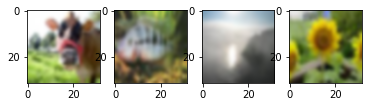

In [12]:
plt.subplot(141)
plt.imshow(x_train[0], interpolation='bicubic')
plt.grid(False)
plt.subplot(142)
plt.imshow(x_train[4], interpolation='bicubic')
plt.grid(False)
plt.subplot(143)
plt.imshow(x_train[8], interpolation='bicubic')
plt.grid(False)
plt.subplot(144)
plt.imshow(x_train[12], interpolation='bicubic')
plt.grid(False)
plt.show()

In [13]:
y_train[0], y_train[4], y_train[8], y_train[12]

(array([19]), array([1]), array([23]), array([82]))

In [14]:
np.max(y_train), np.min(y_train)

(99, 0)

In [15]:
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

print(x_train.shape, x_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)


In [16]:
y_train = tf.keras.utils.to_categorical(y_train, 100)
y_test = tf.keras.utils.to_categorical(y_test, 100)
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

# Model 생성

In [17]:
model = Sequential()

model.add(Conv2D(32, 3, padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))

model.add(MaxPooling2D(2))
model.add(Activation('relu'))

model.add(Conv2D(64, 3, padding='same'))
model.add(Activation('relu'))

model.add(MaxPooling2D(2))
model.add(Activation('relu'))

model.add(Dropout(0.1))

model.add(Conv2D(128, 3, padding='same'))
model.add(Activation('relu'))

model.add(MaxPooling2D(2))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(100))
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
activation_1 (Activation)    (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0

## Compile

In [18]:
model.compile(loss = 'categorical_crossentropy',
             optimizer = tf.keras.optimizers.Adam(0.0001),
             metrics=['accuracy'])

## Best Model Save(모델 저장)

In [19]:
MODELPATH='model/Cifar{epoch:03d}-{val_loss:.4f}.hdf5'
checkpoint_cb = ModelCheckpoint(MODELPATH, verbose=1, save_best_only=True)
early_stopping_cb = EarlyStopping(patience=20)

## Training(훈련)

In [21]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=50, epochs=300, callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/300
 999/1000 [============================>.] - ETA: 0s - loss: 4.3322 - accuracy: 0.0438
Epoch 00001: val_loss improved from inf to 3.94933, saving model to model/Cifar001-3.9493.hdf5
1000/1000 [==============================] - 12s 12ms/step - loss: 4.3319 - accuracy: 0.0439 - val_loss: 3.9493 - val_accuracy: 0.1144
Epoch 2/300
 998/1000 [============================>.] - ETA: 0s - loss: 3.8797 - accuracy: 0.1095
Epoch 00002: val_loss improved from 3.94933 to 3.61176, saving model to model/Cifar002-3.6118.hdf5
1000/1000 [==============================] - 13s 13ms/step - loss: 3.8795 - accuracy: 0.1095 - val_loss: 3.6118 - val_accuracy: 0.1701
Epoch 3/300
1000/1000 [==============================] - ETA: 0s - loss: 3.6467 - accuracy: 0.1447
Epoch 00003: val_loss improved from 3.61176 to 3.39999, saving model to model/Cifar003-3.4000.hdf5
1000/1000 [==============================] - 12s 12ms/step - loss: 3.6467 - accuracy: 0.1447 - val_loss: 3.4000 - val_accuracy: 0.2086
Epoch

## Evaluate(평가)

In [23]:
del model

In [24]:
model = load_model('model/Cifar075-1.9770.hdf5')

In [25]:
model.evaluate(x_test, y_test)[1]

313/313 [==============================] - 2s 5ms/step - loss: 1.9770 - accuracy: 0.4912


0.4912000000476837

In [26]:
y_vloss = history.history['val_loss']
y_vacc = history.history['val_accuracy']
y_loss = history.history['loss']
y_acc = history.history['accuracy']

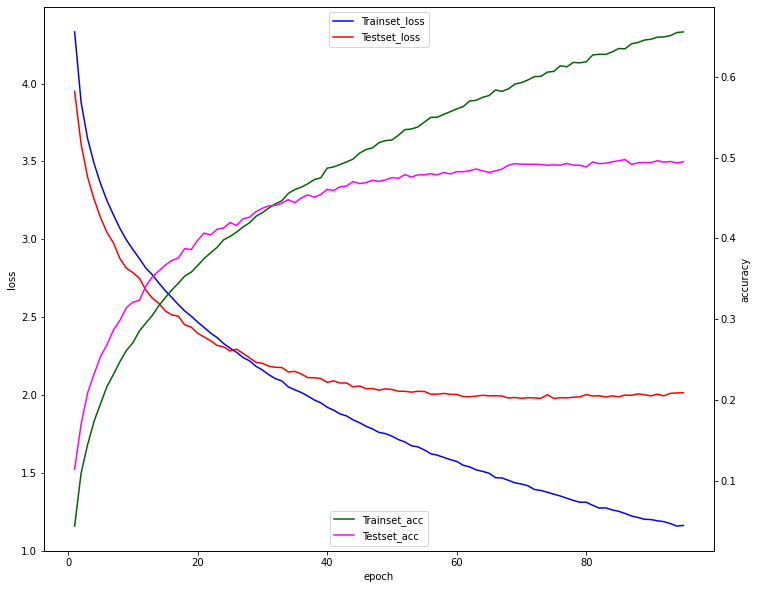

In [27]:
x_len = np.arange(1, len(y_loss) + 1 )
fig, ax0 = plt.subplots(figsize=(12, 10))

ax1 = ax0.twinx()

ax0.plot(x_len, y_loss, c='blue', label='Trainset_loss')
ax0.plot(x_len, y_vloss, c='red', label='Testset_loss')
ax0.set_ylabel('loss')
ax1.plot(x_len, y_acc, c='darkgreen', label='Trainset_acc')
ax1.plot(x_len, y_vacc, c='magenta', label='Testset_acc')
ax1.set_ylabel('accuracy')
ax0.set_xlabel('epoch')
ax0.legend(loc='upper center')
ax1.legend(loc='lower center')
plt.show()